In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data(file_path):
    """
    Load the dataset from a TSV file.
    
    :param file_path (str): The path to the .tsv file containing the data.
    
    :return pandas.DataFrame: The loaded dataset.
    """
    data = pd.read_csv(file_path, sep='\t')
    return data

In [3]:
file_path = '../data/raw/filtered.tsv'

In [4]:
dataset = load_data(file_path)

In [5]:
dataset.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [6]:
dataset.describe()

,Unnamed: 0,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000,577777.000000
mean,288888.000000,0.758469,0.157652,0.541372,0.434490
std,166789.997578,0.092695,0.108057,0.457571,0.458904
min,0.000000,0.600001,0.000000,0.000033,0.000033
25%,144444.000000,0.681105,0.066667,0.012171,0.000707
50%,288888.000000,0.754439,0.141791,0.806795,0.085133
75%,433332.000000,0.831244,0.238095,0.990469,0.973739
max,577776.000000,0.950000,0.400000,0.999724,0.999730


In [7]:
dataset.isnull().sum()

Unnamed: 0     0
reference      0
translation    0
similarity     0
lenght_diff    0
ref_tox        0
trn_tox        0
dtype: int64

### Distribution of toxicity levels in the reference and translation texts

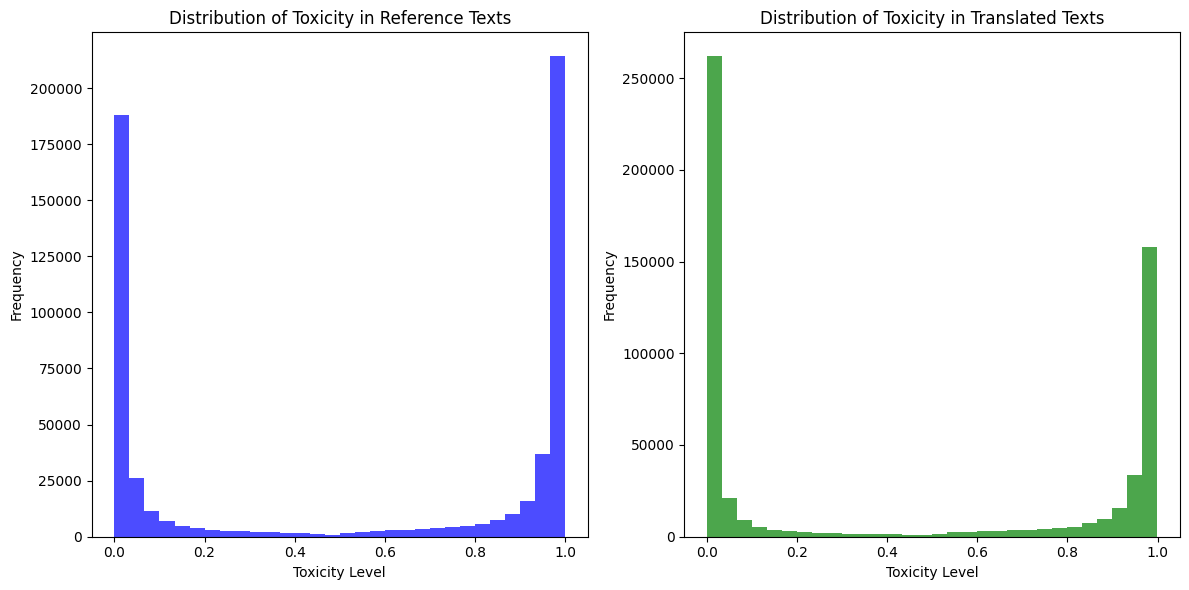

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(dataset['ref_tox'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Toxicity in Reference Texts')
plt.xlabel('Toxicity Level')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(dataset['trn_tox'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Toxicity in Translated Texts')
plt.xlabel('Toxicity Level')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Plotting similarity vs toxicity difference

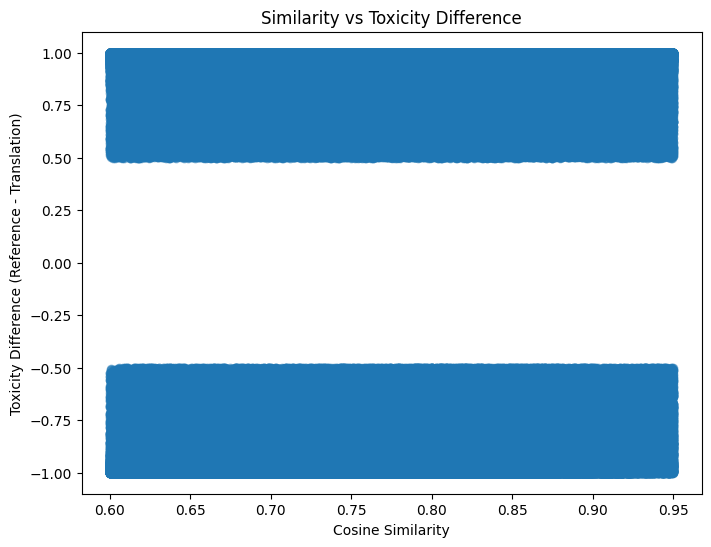

In [9]:
plt.figure(figsize=(8, 6))
toxicity_difference = dataset['ref_tox'] - dataset['trn_tox']
plt.scatter(dataset['similarity'], toxicity_difference, alpha=0.5)
plt.title('Similarity vs Toxicity Difference')
plt.xlabel('Cosine Similarity')
plt.ylabel('Toxicity Difference (Reference - Translation)')
plt.show()